# News Accounts Following

Author: Jasmine Khuu

Visualization that shows the number of followers for each account and the amount that might be news-accounts. 

In [31]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# paths
folder_path = 'raw_tiktokData/following/'
news_accounts_path = 'List of News Accounts (both sections) - news accounts.csv'

#### 1. Load news accounts from CSV & extract followed usernames

In [32]:
# Function to load news accounts from a CSV file
def load_news_accounts(news_accounts_path):
    df = pd.read_csv(news_accounts_path)
    news_accounts = df['Username'].tolist()
    return news_accounts

# Function to extract followed usernames from a JSON file
def extract_followed_usernames(json_file_path):
    with open(json_file_path, 'r') as file:
        followed_accounts = json.load(file)
        followed_usernames = [account['UserName'] for account in followed_accounts]
    return followed_usernames

#### 2. Find overlap

In [33]:
# Function to identify the number of news accounts each user is following
def count_news_accounts(followed_usernames, news_accounts):
    news_accounts_followed = len(set(followed_usernames) & set(news_accounts))
    non_news_accounts_followed = len(set(followed_usernames)) - news_accounts_followed
    return news_accounts_followed, non_news_accounts_followed

# Load news accounts
news_accounts = load_news_accounts(news_accounts_path)

# Initialize lists to store data for the bar chart
usernames = []
news_account_counts = []
non_news_account_counts = []

# Iterate over all JSON files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        json_file_path = os.path.join(folder_path, file_name)
        followed_usernames = extract_followed_usernames(json_file_path)
        
        # Count the number of news and non-news accounts followed
        news_count, non_news_count = count_news_accounts(followed_usernames, news_accounts)
        
        # Store data for the bar chart
        usernames.append(file_name.split('.')[0])  # Extract username from file name
        news_account_counts.append(news_count)
        non_news_account_counts.append(non_news_count)


#### 3. generate bar chart

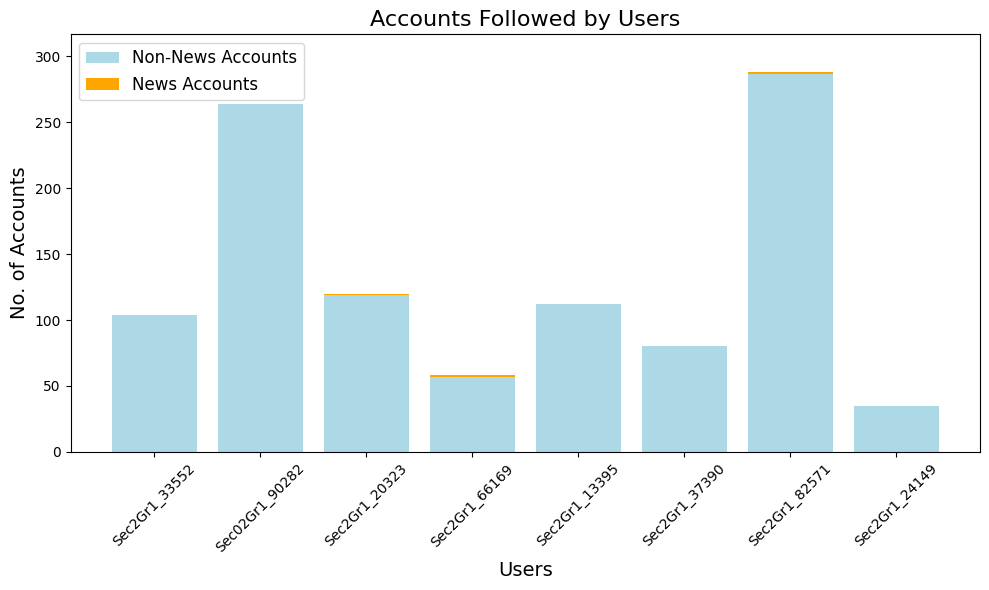

In [34]:
# Convert lists to numpy arrays for plotting
usernames = np.array(usernames)
news_account_counts = np.array(news_account_counts)
non_news_account_counts = np.array(non_news_account_counts)

# Generate stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot non-news accounts first
ax.bar(usernames, non_news_account_counts, label='Non-News Accounts', color='lightblue')

# Plot news accounts on top, starting at the top of non-news accounts
ax.bar(usernames, news_account_counts, bottom=non_news_account_counts, label='News Accounts', color='orange')

ax.set_xlabel('Users', fontsize=14)
ax.set_ylabel('No. of Accounts', fontsize=14)
ax.set_title('Accounts Followed by Users', fontsize=16)
ax.legend(fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add some space between bars and the top of the graph
ax.set_ylim(top = (news_account_counts.max() + non_news_account_counts.max()) * 1.1)

plt.tight_layout()
plt.show()


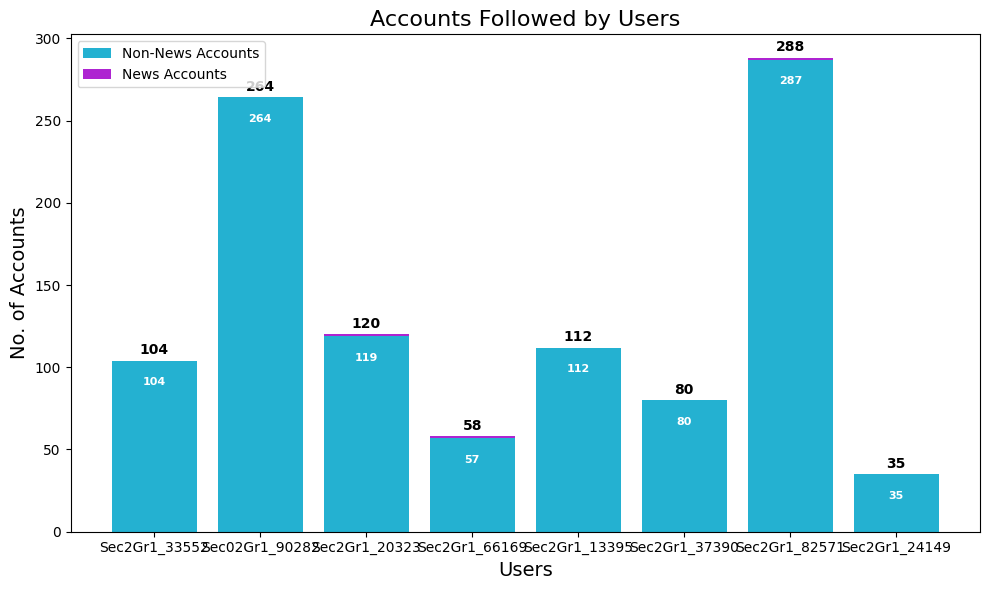

In [37]:
# Convert lists to numpy arrays for plotting
usernames = np.array(usernames)
news_account_counts = np.array(news_account_counts)
non_news_account_counts = np.array(non_news_account_counts)

fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(usernames))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
colors = ['#24b1d1', '#ae24d1']
for i, count in enumerate([non_news_account_counts, news_account_counts]):
    ax.bar(usernames, count, bottom=bottom, color=colors[i])
    bottom += count

ax.set_xlabel('Users', fontsize=14)
ax.set_ylabel('No. of Accounts', fontsize=14)
ax.set_title('Accounts Followed by Users', fontsize=16)

# Add value labels above the bars
totals = news_account_counts + non_news_account_counts
y_offset = 4
for i, total in enumerate(totals):
    ax.text(usernames[i], total + y_offset, round(total), ha='center', weight='bold')

# Add value labels inside the bars
y_offset = -15
for bar, total in zip(ax.patches, totals):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset,
            round(bar.get_height()), ha='center', color='w', weight='bold', size=8)

ax.legend(['Non-News Accounts', 'News Accounts'])

plt.tight_layout()
plt.show()
